# Singular value decomposition analysis of Electronic Circular Dichorism spectra of a synthesized peptide ABGY 

Here we have an electronic circular dichorism spectra of custom made peptide ABGY dissolved in 2,2,2-trifluoroethanol (TFE) in 30% water.Circular dichorism spectroscopy is done from wavelength 190 to 250 nm with a space of 1 nm with temperature variation 5 degree celcius to 55 degree celcius.Mean residue elipsity also calculated.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD


In [39]:
data=pd.read_csv("ABGY_30TFE_MRE.csv")

In [71]:
data

,Wavelength,5,10,15,20,25,30,35,40,45,50,55
0,250,0.02598,0.00587,0.00960,0.01137,0.00994,0.01919,0.03173,0.01193,0.01662,0.01293,0.03156
1,249,-0.03709,-0.08021,-0.02629,-0.04551,0.02990,0.01352,-0.02846,-0.10790,0.03388,-0.09945,-0.06012
2,248,-0.06712,-0.13180,-0.05925,-0.08904,0.00155,-0.00317,-0.06956,-0.20628,0.01987,-0.17144,-0.10990
3,247,-0.08384,-0.16958,-0.09611,-0.13163,-0.05963,-0.03388,-0.10649,-0.28842,-0.01958,-0.22223,-0.14233
4,246,-0.10484,-0.21135,-0.14425,-0.18450,-0.14419,-0.08244,-0.15174,-0.36137,-0.08150,-0.26829,-0.17683
...,...,...,...,...,...,...,...,...,...,...,...,...
56,194,26.47096,24.90628,23.57543,22.04908,20.71968,19.70338,18.31964,16.76052,15.37130,14.30818,12.62164
57,193,28.48944,26.81995,25.33367,23.76854,22.46394,21.33965,19.82187,18.32602,16.84193,15.79701,13.88216
58,192,29.35087,27.68662,26.04785,24.50127,23.29454,22.10943,20.42095,19.08390,17.68246,16.62586,14.72678
59,191,28.94915,27.46097,25.66478,24.19290,23.15269,21.98274,20.04631,18.96376,17.90254,16.75020,15.27915


With the help of ECD spectrum it will be easier for us to know the underlying secondary structure of this peptide.But this data has based on 11 temperatures.

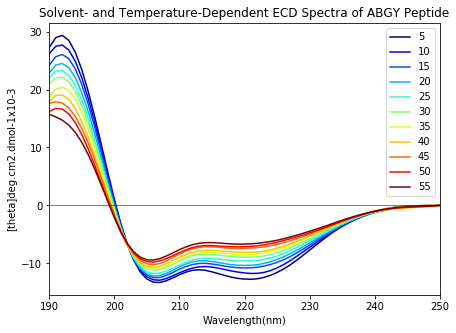

In [76]:
data.plot.line(x='Wavelength',y=['5','10','15','20','25','30','35','40','45','50','55'],figsize=(7,5),colormap='jet')
plt.xlabel('Wavelength(nm)')
plt.ylabel('[theta]deg.cm2.dmol-1x10-3')
plt.title('Solvent- and Temperature-Dependent ECD Spectra of ABGY Peptide')
plt.xlim([190,250])
plt.axhline(0, color='black',lw=0.5)
plt.show()

As this data has 11 columns it is cumbersome to get insight of this data.Dimensionality reduction technique such as SVD can be used to get the main components of the spectrum. 

In [43]:
Wavelength=data['Wavelength']

In [44]:
spectrum=data.iloc[:,1:]

As SVD is a unsupervised machine learning algorithm spectrum and wavelength are separted.

In [45]:
svd = TruncatedSVD(n_components=2)
svd.fit(spectrum)
svds = svd.transform(spectrum)
output_df=pd.DataFrame(svds,columns=['SVD1','SVD2'])

In TrunkatedSVD algorithm hyperparameter is the number of components.From the domain knowledge we know there are mainly two prperties of this peptide's ECD spectrum.First one is helix making properties and second one is random coil property. so n_components is kept 2 here.

In [55]:
final_output=pd.concat([Wavelength,output_df], axis=1)
final_output

,Wavelength,SVD1,SVD2
0,250,0.053692,-0.018053
1,249,-0.118131,0.043380
2,248,-0.255859,0.096317
3,247,-0.390969,0.144525
4,246,-0.553760,0.191109
...,...,...,...
56,194,66.272492,2.202967
57,193,71.752650,1.856537
58,192,74.318269,1.394483
59,191,73.828558,0.724480


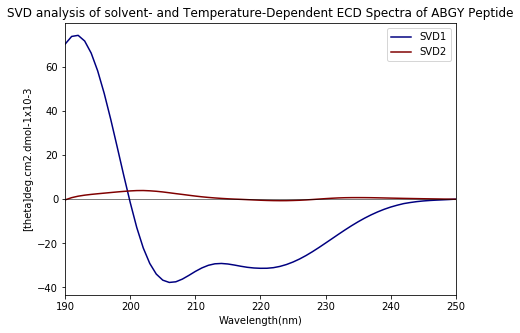

In [81]:
final_output.plot.line(x='Wavelength',y=['SVD1','SVD2'],figsize=(7,5),colormap='jet')
plt.xlabel('Wavelength(nm)')
plt.ylabel('[theta]deg.cm2.dmol-1x10-3')
plt.title('SVD analysis of solvent- and Temperature-Dependent ECD Spectra of ABGY Peptide')
plt.xlim([190,250])
plt.axhline(0, color='black',lw=0.5)
plt.show()

In [79]:
print("Variance explained by SVD1:",svd.explained_variance_ratio_[0])
print("Variance explained by SVD2:",svd.explained_variance_ratio_[1])

Variance explained by SVD1: 0.9978870735992115
Variance explained by SVD2: 0.0019780403203154707


In [80]:
print("Total varience explained by SVD1 and SVD2:",svd.explained_variance_ratio_.sum())

Total varience explained by SVD1 and SVD2: 0.9998651139195269


Observations:
Approx 99.8% varience explained by SVD1.so SVD1 represents helix making properties.
and only 0.002% varience explained by SVD2.so SVD2 represents random coil properties of the peptides.

Reference:
1.https://en.wikipedia.org/wiki/Singular_value_decomposition
        2.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
            
3.Tomoki Shiratori, Satoru Goto, Tomoyo Sakaguchi, Takahiro Kasai, Yuta Otsuka, Kyohei Higashi, Kosho Makino, Hideyo Takahashi, Kazushi Komatsu,
Singular value decomposition analysis of the secondary structure features contributing to the circular dichroism spectra of model proteins,
Biochemistry and Biophysics Reports,Volume 28,2021,101153,ISSN 2405-5808,https://doi.org/10.1016/j.bbrep.2021.101153.
            